In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os.path import basename, dirname
import torch
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

from ipywidgets import FloatSlider, interactive
import sys
sys.path.append('..')
from var import fname2mname, network2pair, network_sort_key

In [3]:
method_l = [
    "maxcorr", 
    "mincorr", 
    "jsmaxcorr",
    "jsmincorr",
    "pearsonmaxcorr",
    "pearsonmincorr",
]

In [4]:
# Set `res_d`, `network_l`, `num_neurons_d`
base = "/data/sls/temp/belinkov/contextual-corr-analysis/attn_fine_results1_"
res_fname = {method : base + method for method in 
                method_l}

res_d = {}
for method in method_l:
    with open(res_fname[method], 'rb') as f:
        res_d[method] = pickle.load(f)

network_l = [network for network in res_d["maxcorr"]["corrs"]]

num_heads_d = {}
for network in network_l:
    num_heads_d[network] = len(next(iter(res_d["maxcorr"]["corrs"][network].values()))) # god this is a hack

In [5]:
network_l

['bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_0',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_1',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_2',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_3',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_4',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_5',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_6',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_7',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_8',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_9',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_10',
 'bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_11',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_0',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_1',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_2',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_3',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_4',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_5',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_6',
 'bert_base_cased-ptb_pos_dev_attn_mnli.hdf

# DataFrames

In [6]:
maxcorr_df = pd.DataFrame(res_d["maxcorr"]["similarities"])
maxcorr_df = maxcorr_df.reindex(maxcorr_df.columns)

In [7]:
mincorr_df = pd.DataFrame(res_d["mincorr"]["similarities"])
mincorr_df = mincorr_df.reindex(mincorr_df.columns)

In [8]:
jsmaxcorr_df = pd.DataFrame(res_d["jsmaxcorr"]["similarities"])
jsmaxcorr_df = jsmaxcorr_df.reindex(jsmaxcorr_df.columns)

In [9]:
jsmaxcorr_df["bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_0"]

bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_0          NaN
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_1     0.848012
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_2     0.794043
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_3     0.856378
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_4     0.853718
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_5     0.840666
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_6     0.842526
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_7     0.799676
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_8     0.818872
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_9     0.813349
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_10    0.707350
bert_base_cased-ptb_pos_dev_attn_unfine.hdf5_11    0.736037
bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_0       0.950874
bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_1       0.814863
bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_2       0.803413
bert_base_cased-ptb_pos_dev_attn_mnli.hdf5_3       0.832956
bert_base_cased-ptb_pos_dev_attn_mnli.hd

In [10]:
jsmincorr_df = pd.DataFrame(res_d["jsmincorr"]["similarities"])
jsmincorr_df = jsmincorr_df.reindex(jsmincorr_df.columns)

In [11]:
pearsonmaxcorr_df = pd.DataFrame(res_d["pearsonmaxcorr"]["similarities"])
pearsonmaxcorr_df = pearsonmaxcorr_df.reindex(pearsonmaxcorr_df.columns)

In [12]:
pearsonmincorr_df = pd.DataFrame(res_d["pearsonmincorr"]["similarities"])
pearsonmincorr_df = pearsonmincorr_df.reindex(pearsonmincorr_df.columns)

# Heatmaps

In [13]:
short_labels = [label.split('_')[0] + ' ' + label.split('_')[-2].rstrip('.hdf5') + ' ' + label.split('_')[-1] for label in network_l]
print(short_labels)

['bert unfine 0', 'bert unfine 1', 'bert unfine 2', 'bert unfine 3', 'bert unfine 4', 'bert unfine 5', 'bert unfine 6', 'bert unfine 7', 'bert unfine 8', 'bert unfine 9', 'bert unfine 10', 'bert unfine 11', 'bert mnli 0', 'bert mnli 1', 'bert mnli 2', 'bert mnli 3', 'bert mnli 4', 'bert mnli 5', 'bert mnli 6', 'bert mnli 7', 'bert mnli 8', 'bert mnli 9', 'bert mnli 10', 'bert mnli 11', 'bert qnli 0', 'bert qnli 1', 'bert qnli 2', 'bert qnli 3', 'bert qnli 4', 'bert qnli 5', 'bert qnli 6', 'bert qnli 7', 'bert qnli 8', 'bert qnli 9', 'bert qnli 10', 'bert qnli 11', 'bert qqp 0', 'bert qqp 1', 'bert qqp 2', 'bert qqp 3', 'bert qqp 4', 'bert qqp 5', 'bert qqp 6', 'bert qqp 7', 'bert qqp 8', 'bert qqp 9', 'bert qqp 10', 'bert qqp 11', 'bert sst-2 0', 'bert sst-2 1', 'bert sst-2 2', 'bert sst-2 3', 'bert sst-2 4', 'bert sst-2 5', 'bert sst-2 6', 'bert sst-2 7', 'bert sst-2 8', 'bert sst-2 9', 'bert sst-2 10', 'bert sst-2 11']


### MaxCorr, MinCorr

In [14]:
plt.rcParams["figure.figsize"] = (20,15)

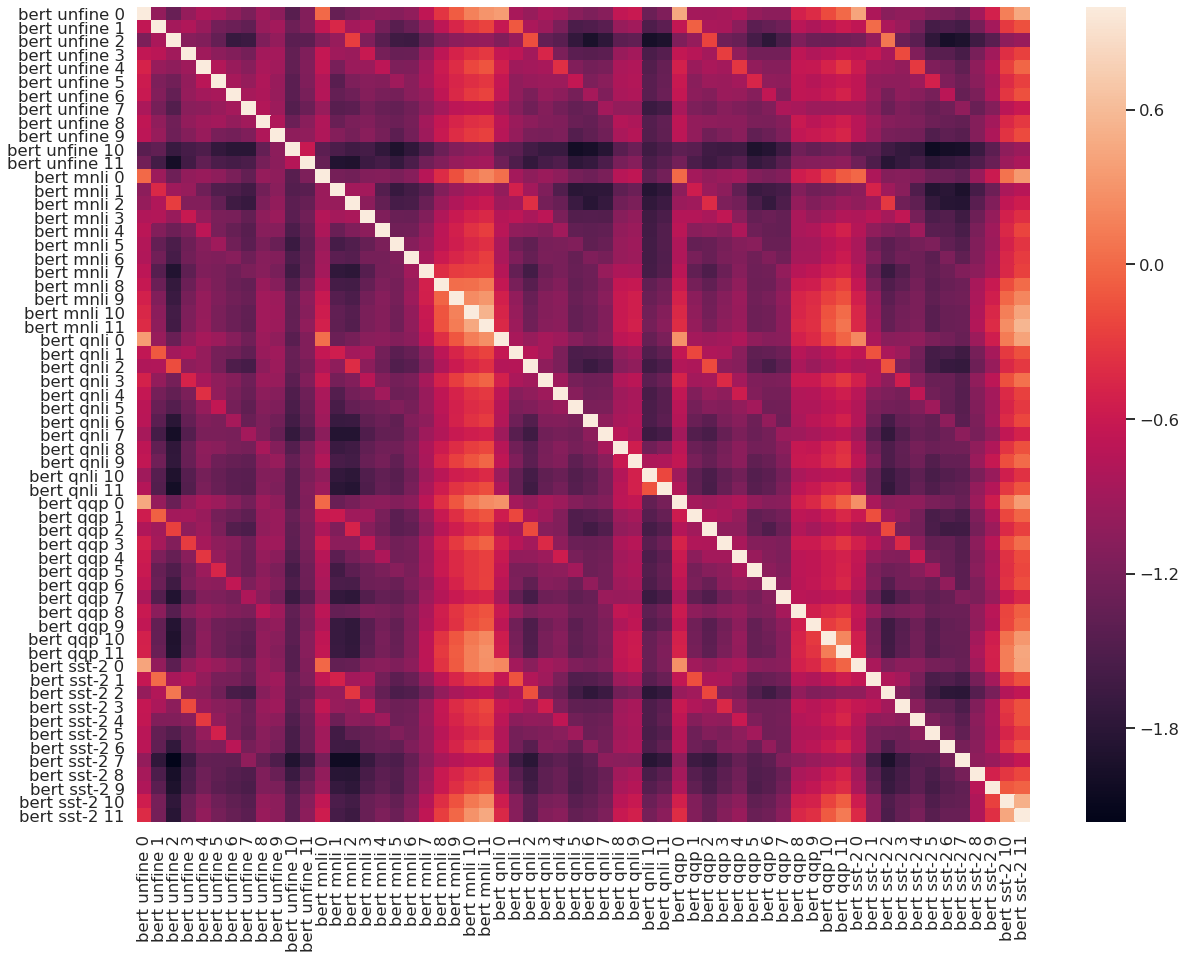

In [21]:
g = sns.heatmap(maxcorr_df.fillna(1), xticklabels=short_labels, yticklabels=short_labels) #, vmin=0, vmax=1)
g.get_figure().savefig('bert-attn-maxcorr-heatmap-finetuned.pdf')

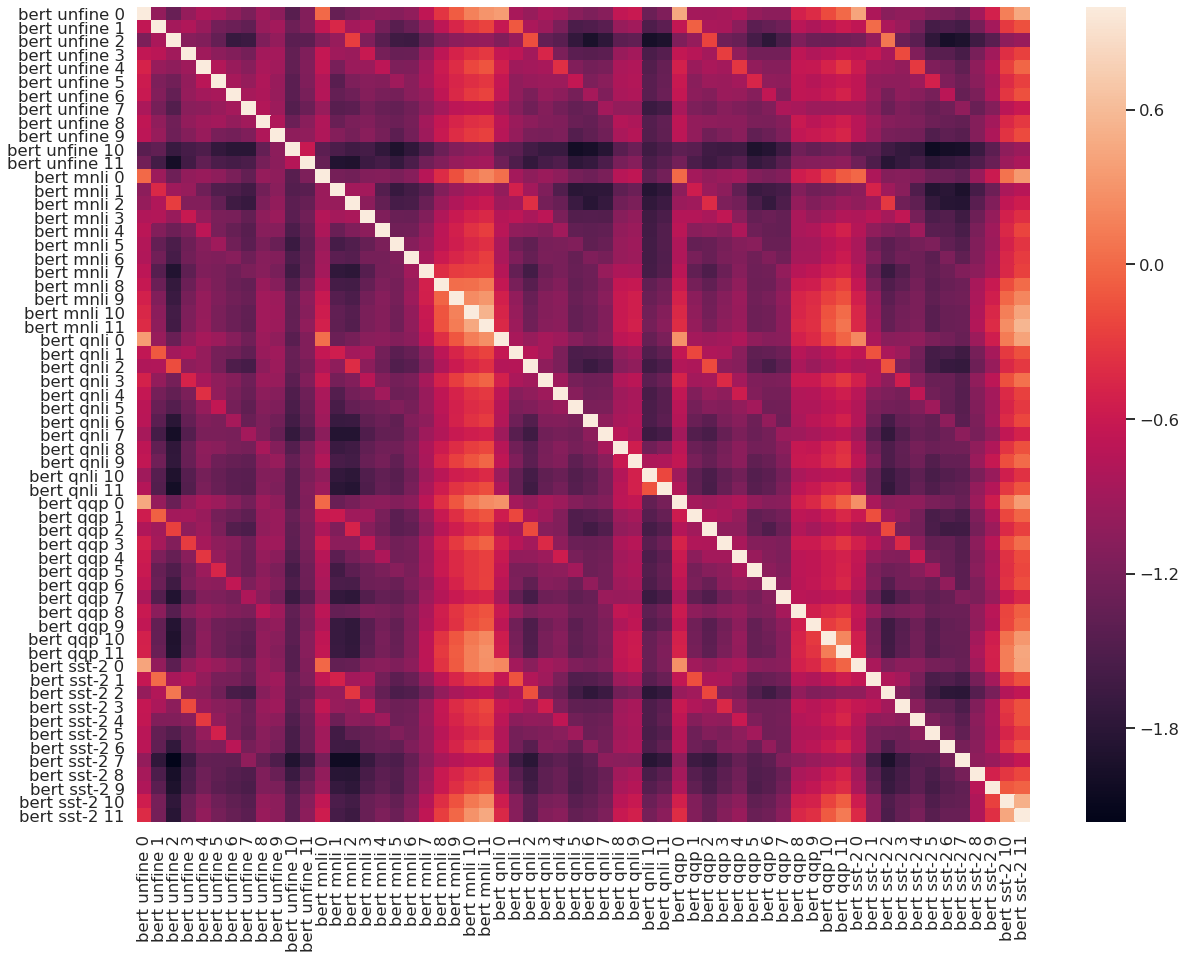

In [22]:
g = sns.heatmap(mincorr_df.fillna(1), xticklabels=short_labels, yticklabels=short_labels) #, vmin=0, vmax=1)
g.get_figure().savefig('bert-attn-mincorr-heatmap-finetuned.pdf')

### JSMaxCorr, JSMinCorr

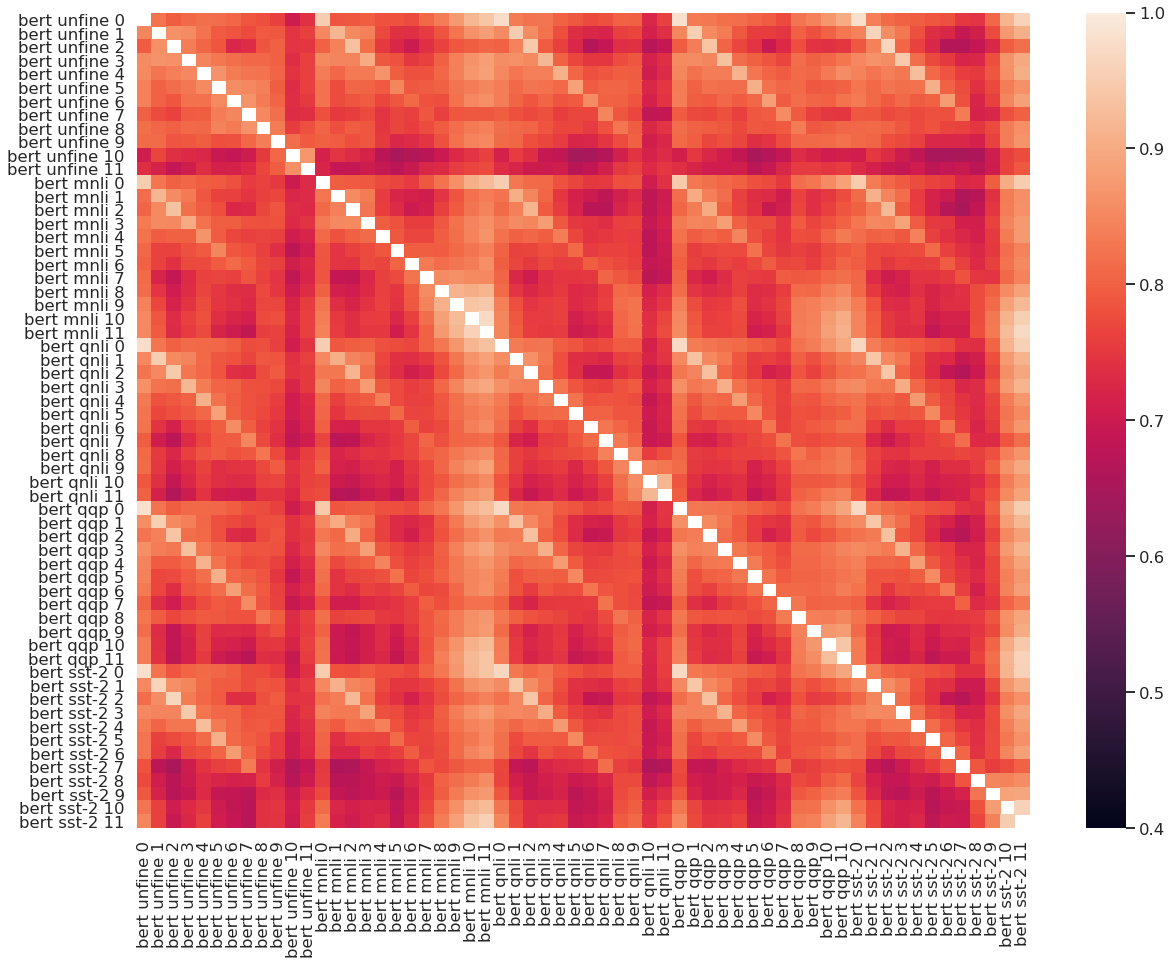

In [27]:
g = sns.heatmap(jsmaxcorr_df, xticklabels=short_labels, yticklabels=short_labels, vmin=0.4, vmax=1)
g.get_figure().savefig('bert-attn-jsmaxcorr-heatmap-finetuned.pdf')

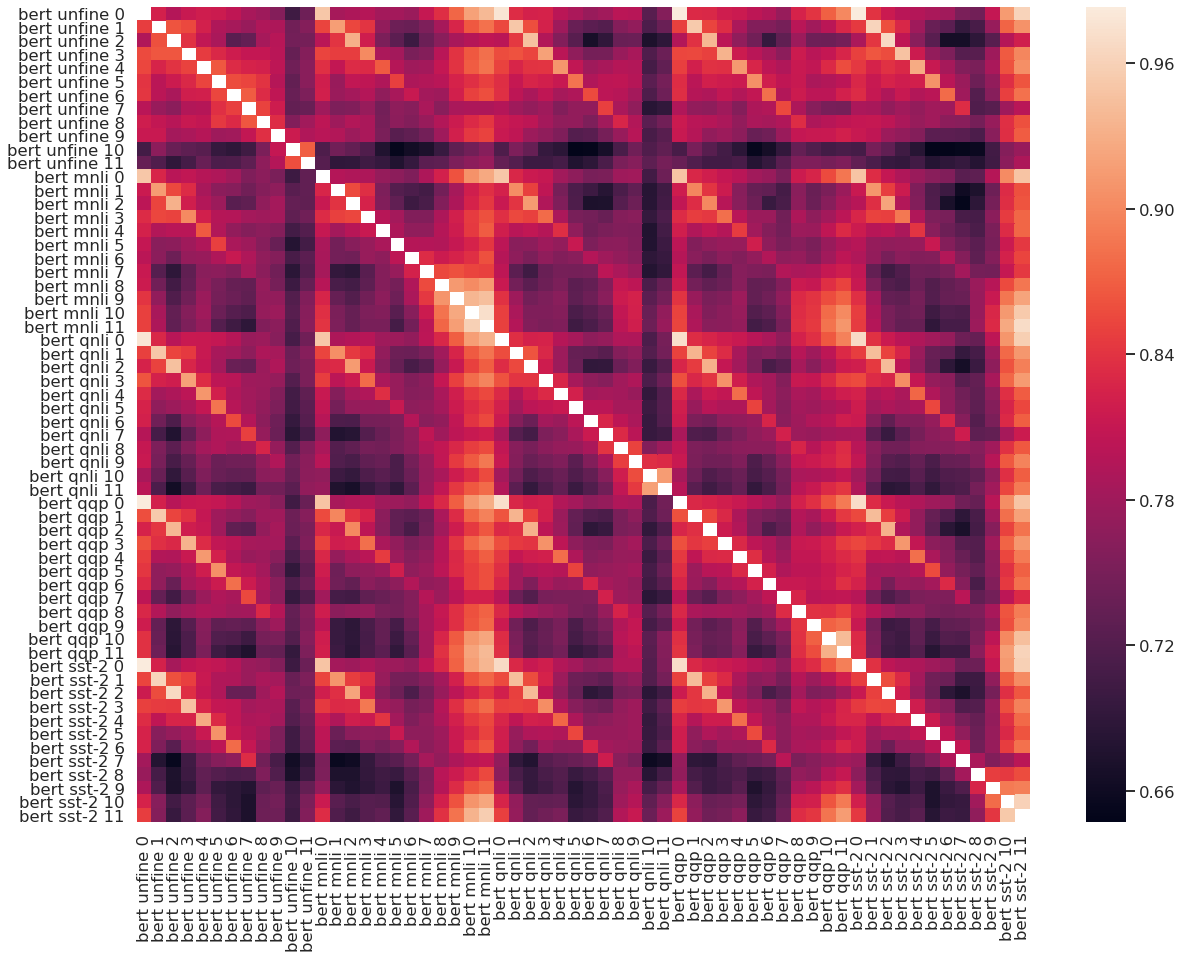

In [24]:
g = sns.heatmap(jsmincorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('bert-attn-jsmincorr-heatmap-finetuned.pdf')

### PearsonMaxCorr, PearsonMinCorr

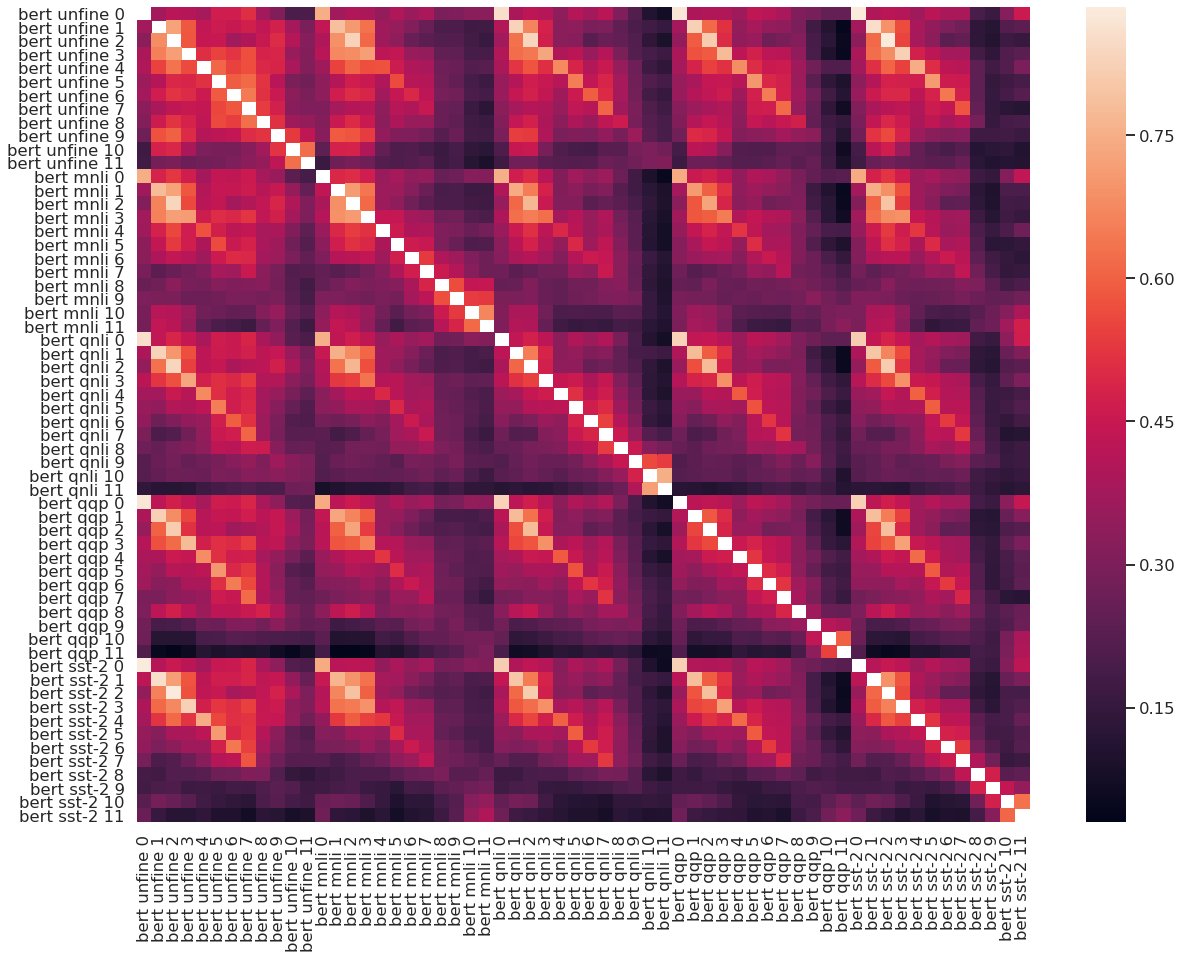

In [25]:
g = sns.heatmap(pearsonmaxcorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('bert-attn-pearsonmaxcorr-heatmap-finetuned.pdf')

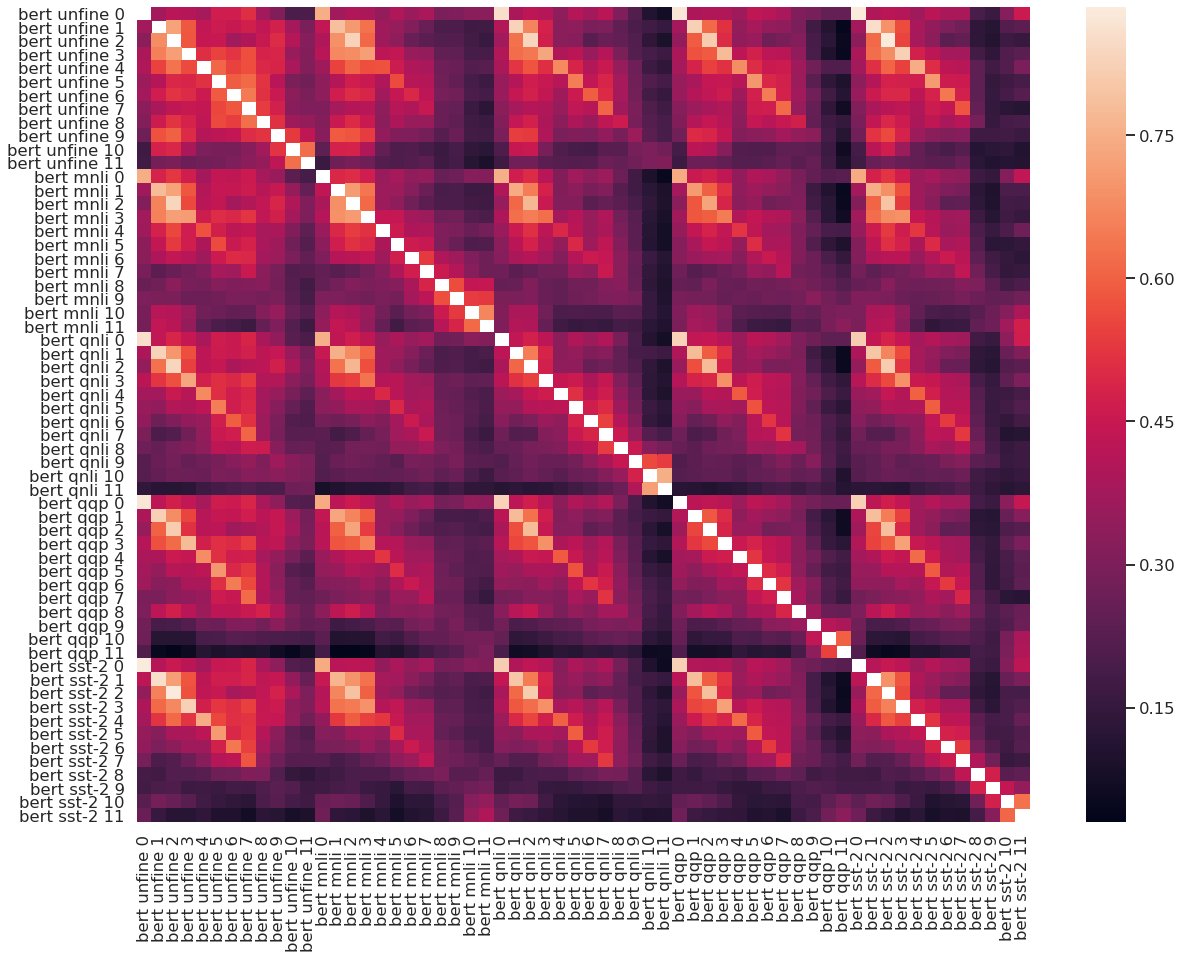

In [26]:
g = sns.heatmap(pearsonmincorr_df, xticklabels=short_labels, yticklabels=short_labels)
g.get_figure().savefig('bert-attn-pearsonmincorr-heatmap-finetuned.pdf')